In [1]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
Area = (166/10)**2
Voc = 0.680
Isc = 11.253
Vmp = 0.594
Imp = 10.739
Pmp = 6.28
Efficiency = 22.9

T = 25 + 273

Jsc = Isc/Area
Jmp = Imp/Area

vp = Vmp/Voc
jp = Jmp/Jsc

In [3]:
FF = vp*jp
print('FF = ',FF)

FF =  0.8336294635156115


In [4]:
# Define the function to find roots
def equation_m(x):
    return x*math.log10(vp) + math.log10(x+1)

# Use fsolve to find the root
initial_guess_m = 10
solution_m = fsolve(equation_m,initial_guess_m)

m = solution_m[0]
print('m = ',m)


# Define the function to find roots
def equation_gamma(x):
    return vp*(1-((1-x)*vp)-x*(vp**m)) - FF

initial_guess_gamma = 1
solution_gamma = fsolve(equation_gamma,initial_guess_gamma)

gamma = solution_gamma[0]
print('gamma = ',gamma)

m =  23.72368196174617
gamma =  0.9937225192933417


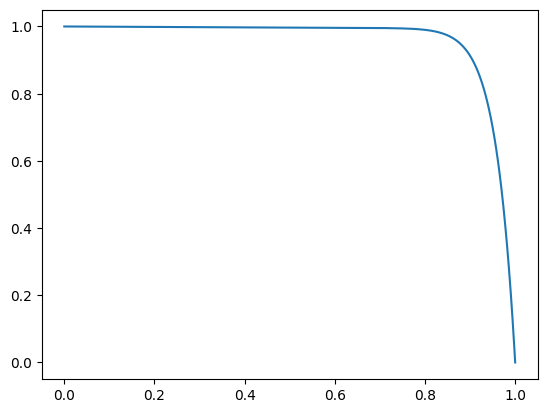

In [5]:
v_check = np.linspace(0,1,500)
j_check0 = 1 - ((1-gamma)*v_check) - gamma*(v_check**m)

plt.plot(v_check,j_check0)

In [6]:
# Define the system of equations
def equations(vars):
    x, y = vars
    eq1 = (x+1)**(-1/x) - 0.05*(1-y) - vp
    eq2 = vp*(1 - ((1-y)*vp) - y*(vp**x)) - FF
    return [eq1, eq2]

# Initial guess for (x, y)
initial_guess = (10, 1)

# Use fsolve to find the roots
solution_m_gamma = fsolve(equations, initial_guess)

m_actual = solution_m_gamma[0]
gamma_actual = solution_m_gamma[1]

print('m_actual = ',m_actual,'gamma_actual = ',gamma_actual)

m_actual =  23.823175985012355 gamma_actual =  0.9930782293382365


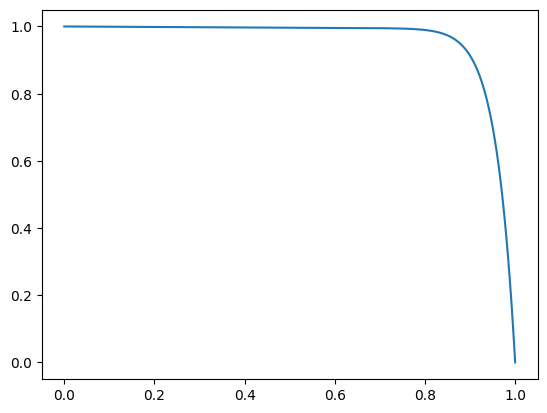

In [7]:
v_check = np.linspace(0,1,500)
j_check1 = 1 - ((1-gamma_actual)*v_check) - gamma_actual*(v_check**m_actual)

plt.plot(v_check,j_check1)

In [8]:
Rsh = Voc/(Jsc*(1-gamma_actual))
# Rsh_total = Rsh/Area
# Rsh_total = Rsh*Area/81
Rsh_total = Rsh/(Area)
# Rsh_total = Rsh

# Assumption zeta = 1, theta = 0.6 and Temp = 25 degC
zeta = 1
VT = (1.38*10**-23)*T/(1.6*10**-19)
K = 1/(zeta*VT)
theta = 0.6

Rs = ((Voc*K/m)-1) / (theta*gamma*Jsc*K)
# Rs_total = Rs/Area
# Rs_total = Rs*Area/81
Rs_total = Rs/Area
# Rs_total = Rs

print('Rshunt for the complete array = ',Rsh_total,' ohms')
print('Rseries for the complete array = ',Rs_total,' ohms')

Rx = 2*Rs_total*9
print('Rseries for the complete array = ',Rx,' ohms')

Rshunt for the complete array =  8.730183817973566  ohms
Rseries for the complete array =  0.0004412964893670047  ohms
Rseries for the complete array =  0.007943336808606084  ohms


Text(0, 0.5, 'I (in A)')

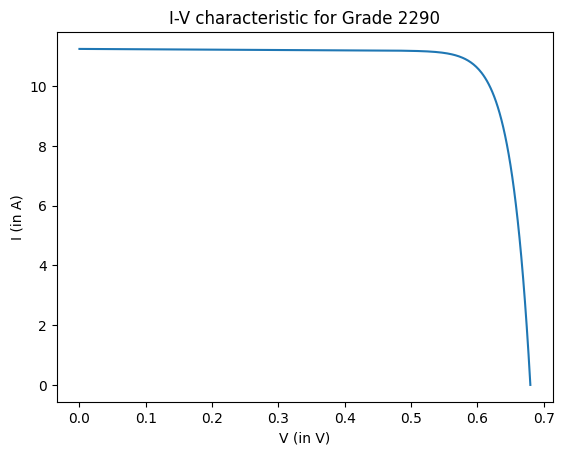

In [9]:
plt.plot(v_check*Voc,j_check1*Jsc*Area)
plt.title('I-V characteristic for Grade 2290')
plt.xlabel('V (in V)')
plt.ylabel('I (in A)')

In [10]:
Jph = Jsc*(1 + (Rs/Rsh))
J0 = 0.000001*Jph

In [11]:
J0

4.083890557669562e-08

In [12]:
Jph

0.04083890557669562

X-axis (I in A):
[0.14059446 0.14059446 0.14804723 1.13810098 1.65467101 1.56733388
 1.62695603 1.76762704 1.98562052 2.18568078 2.36338274 2.52454886
 2.66545277 2.78469707 2.88554235 2.97427687 3.05369544 3.12100326
 3.17596743 3.22021824 3.25189251 3.27285342 3.29358143 3.30918567
 3.32269381 3.33410586 3.33666775 3.33364006 3.32851629 3.32665309
 3.32758469 3.33270847 3.33759935 3.34016124 3.33713355 3.33014658
 3.3257215  3.3257215  3.32176222 3.30918567 3.28775896 3.26120847
 3.2302329  3.20135342 3.1820228  3.16548697]

Y-axis (V in V):
[ 0.64414421  0.64390483  0.64318672  0.57703005  0.54573206  0.54875414
  0.54528323  0.53412247  0.51374586  0.49309996  0.4726635   0.45180814
  0.43044412  0.40961868  0.38840427  0.36736938  0.34570614  0.32305549
  0.29837017  0.27329586  0.24905936  0.22482287  0.20085566  0.17712783
  0.15328031  0.12955248  0.10615379  0.08338345  0.06055327  0.03799238
  0.001877   -0.02304769 -0.03600375 -0.04991729 -0.06960571 -0.0892642
 -0.10871324 

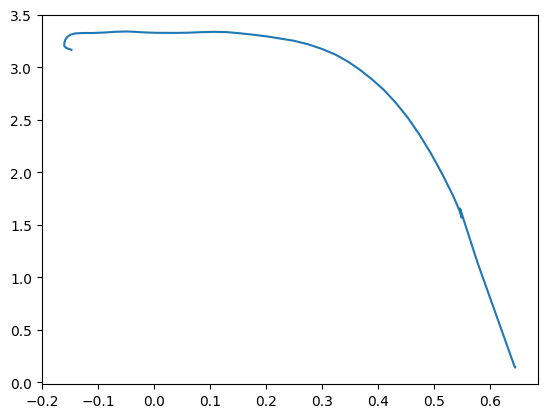

In [13]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '../Hardware/data_csv.csv'
data = pd.read_csv(file_path, header=None, skiprows=1)

# Extracting values from the first and second columns
x_values = np.array(data.iloc[:, 0])  # First column for I (in A)
y_values = np.array(data.iloc[:, 1])  # Second column for V (in V)

# Display the arrays
print("X-axis (I in A):")
print(x_values)
print("\nY-axis (V in V):")
print(y_values)


plt.plot(y_values,x_values)
